# Import Data #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pada analisa ini akan menggunakan `dataset_4` yang merupakan hasil modeling pada `dataset_3`, berisi kolom-kolom yang sama dengan output `dataset_3` hanya saja ditambahkan 1 kolom baru yaitu `revenue` yang didapatkan dari perhitungan kolom *biomass* x *selling_price* pada `dataset_3`.

In [3]:
df = pd.read_csv('dataset_4.csv')
df.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,pond_name_A2,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight,avg_body_weight_pred,biomass,biomass_pred
0,3458,12969,1,566669,4968.0,0,1.25,120,45.0,4811.01,...,0,0,0,1,78.45,77.67,13.59,13.013491,5.727651e+06,5.790830e+06
1,3459,12996,1,566669,4968.0,0,1.25,121,45.0,4636.22,...,0,0,0,1,77.72,77.55,14.32,13.356010,5.869323e+06,5.903970e+06
2,4044,14348,1,215858,1250.0,0,1.25,120,45.0,1249.91,...,1,0,0,0,86.86,88.47,12.28,12.328661,2.354399e+06,2.290473e+06
3,4045,14349,1,227526,1310.0,0,1.25,120,45.0,1309.70,...,0,1,0,0,88.21,88.64,11.85,12.095262,2.439361e+06,2.447478e+06
4,4046,14350,1,180854,1040.0,0,1.25,120,45.0,1040.11,...,0,0,1,0,88.19,88.86,12.12,12.803391,2.057593e+06,1.946002e+06


In [4]:
df['revenue'] = df['biomass_pred'] * df['selling_price']
df.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight,avg_body_weight_pred,biomass,biomass_pred,revenue
0,3458,12969,1,566669,4968.0,0,1.25,120,45.0,4811.01,...,0,0,1,78.45,77.67,13.59,13.013491,5.727651e+06,5.790830e+06,1.953189e+14
1,3459,12996,1,566669,4968.0,0,1.25,121,45.0,4636.22,...,0,0,1,77.72,77.55,14.32,13.356010,5.869323e+06,5.903970e+06,1.991350e+14
2,4044,14348,1,215858,1250.0,0,1.25,120,45.0,1249.91,...,0,0,0,86.86,88.47,12.28,12.328661,2.354399e+06,2.290473e+06,7.725537e+13
3,4045,14349,1,227526,1310.0,0,1.25,120,45.0,1309.70,...,1,0,0,88.21,88.64,11.85,12.095262,2.439361e+06,2.447478e+06,8.255100e+13
4,4046,14350,1,180854,1040.0,0,1.25,120,45.0,1040.11,...,0,1,0,88.19,88.86,12.12,12.803391,2.057593e+06,1.946002e+06,6.563670e+13


# EDA #

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

## Define Target ##

kolom yang akan digunakan sebagai target adalah `revenue`

In [6]:
df[['total_seed', 'total_harvested', 'survival_rate_pred', 'avg_body_weight_pred', 'biomass_pred', 'revenue']].head()

,total_seed,total_harvested,survival_rate_pred,avg_body_weight_pred,biomass_pred,revenue
0,566669,444548,77.67,13.013491,5.790830e+06,1.953189e+14
1,566669,440388,77.55,13.356010,5.903970e+06,1.991350e+14
2,215858,187493,88.47,12.328661,2.290473e+06,7.725537e+13
3,227526,200709,88.64,12.095262,2.447478e+06,8.255100e+13
4,180854,159488,88.86,12.803391,1.946002e+06,6.563670e+13


## Statistical Descriptive ##

In [7]:
df.describe()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight,avg_body_weight_pred,biomass,biomass_pred,revenue
count,1855.000000,1855.000000,1855.0,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,...,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1.855000e+03,1.855000e+03,1.855000e+03
mean,19955.811860,32740.555795,1.0,198598.604313,1501.944604,0.156334,1.335995,112.935849,50.809164,1518.948916,...,0.025337,0.019946,0.750404,66.619903,66.654825,8.541461,8.559412,1.241810e+06,1.242885e+06,1.666367e+14
std,5879.634556,9890.453279,0.0,138672.506998,1204.525344,0.787121,0.407447,14.259942,8.384903,943.410126,...,0.157189,0.139853,0.432896,28.647294,27.861229,4.576116,3.312633,1.250788e+06,1.233265e+06,4.181160e+14
min,3458.000000,6738.000000,1.0,10.000000,1.020000,0.000000,0.600000,55.000000,20.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.030000,0.020000,2.756648,6.679950e+01,2.552305e+03,0.000000e+00
25%,16154.500000,25603.500000,1.0,85000.000000,800.000000,0.000000,1.250000,100.000000,45.000000,810.000000,...,0.000000,0.000000,1.000000,45.425000,45.875000,5.475000,6.052655,2.717149e+05,2.792882e+05,2.192736e+12
50%,19780.000000,34491.000000,1.0,170478.000000,1250.000000,0.000000,1.250000,120.000000,55.000000,1350.000000,...,0.000000,0.000000,1.000000,71.170000,71.960000,7.690000,8.100490,8.293113e+05,8.272248e+05,2.488332e+13
75%,24894.500000,39677.500000,1.0,293670.000000,2025.000000,0.000000,1.250000,120.000000,55.000000,2129.500000,...,0.000000,0.000000,1.000000,93.245000,92.280000,10.875000,10.660820,1.876245e+06,1.914721e+06,1.334308e+14
max,29874.000000,47282.000000,1.0,702720.000000,30000.000000,12.000000,4.770000,160.000000,90.000000,6880.000000,...,1.000000,1.000000,1.000000,100.000000,99.990000,100.000000,35.869394,6.990862e+06,6.574756e+06,5.378855e+15


## Univariate Analysis ##

**Numerical Columns**

In [8]:
nums = df.select_dtypes(exclude='object')
nums = nums.columns

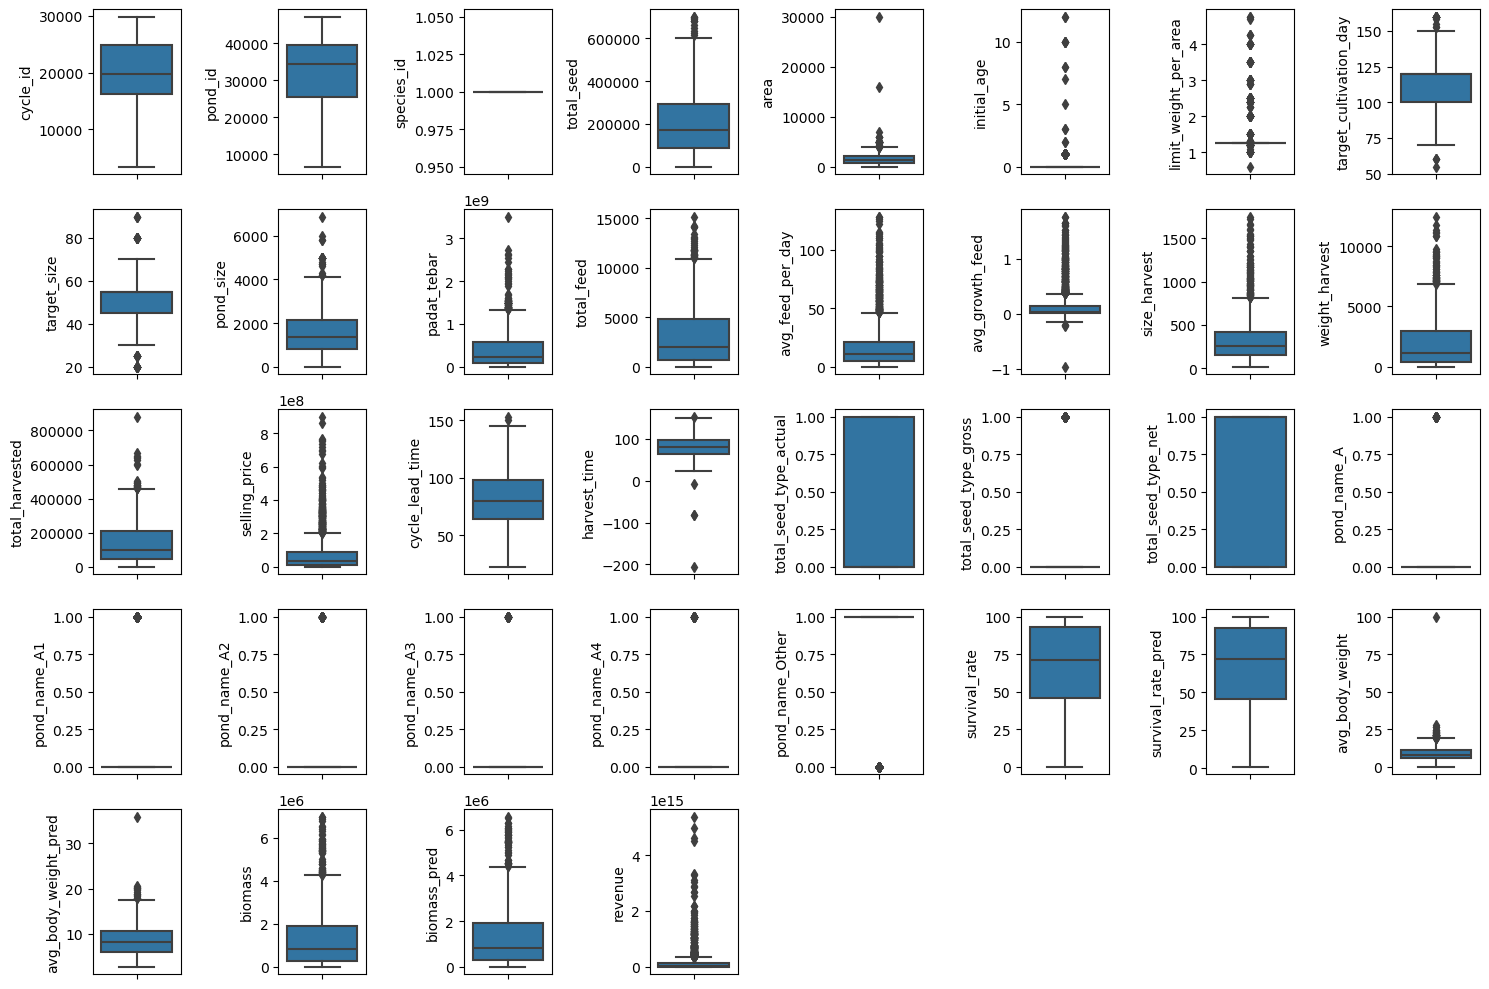

In [9]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(5,8,i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

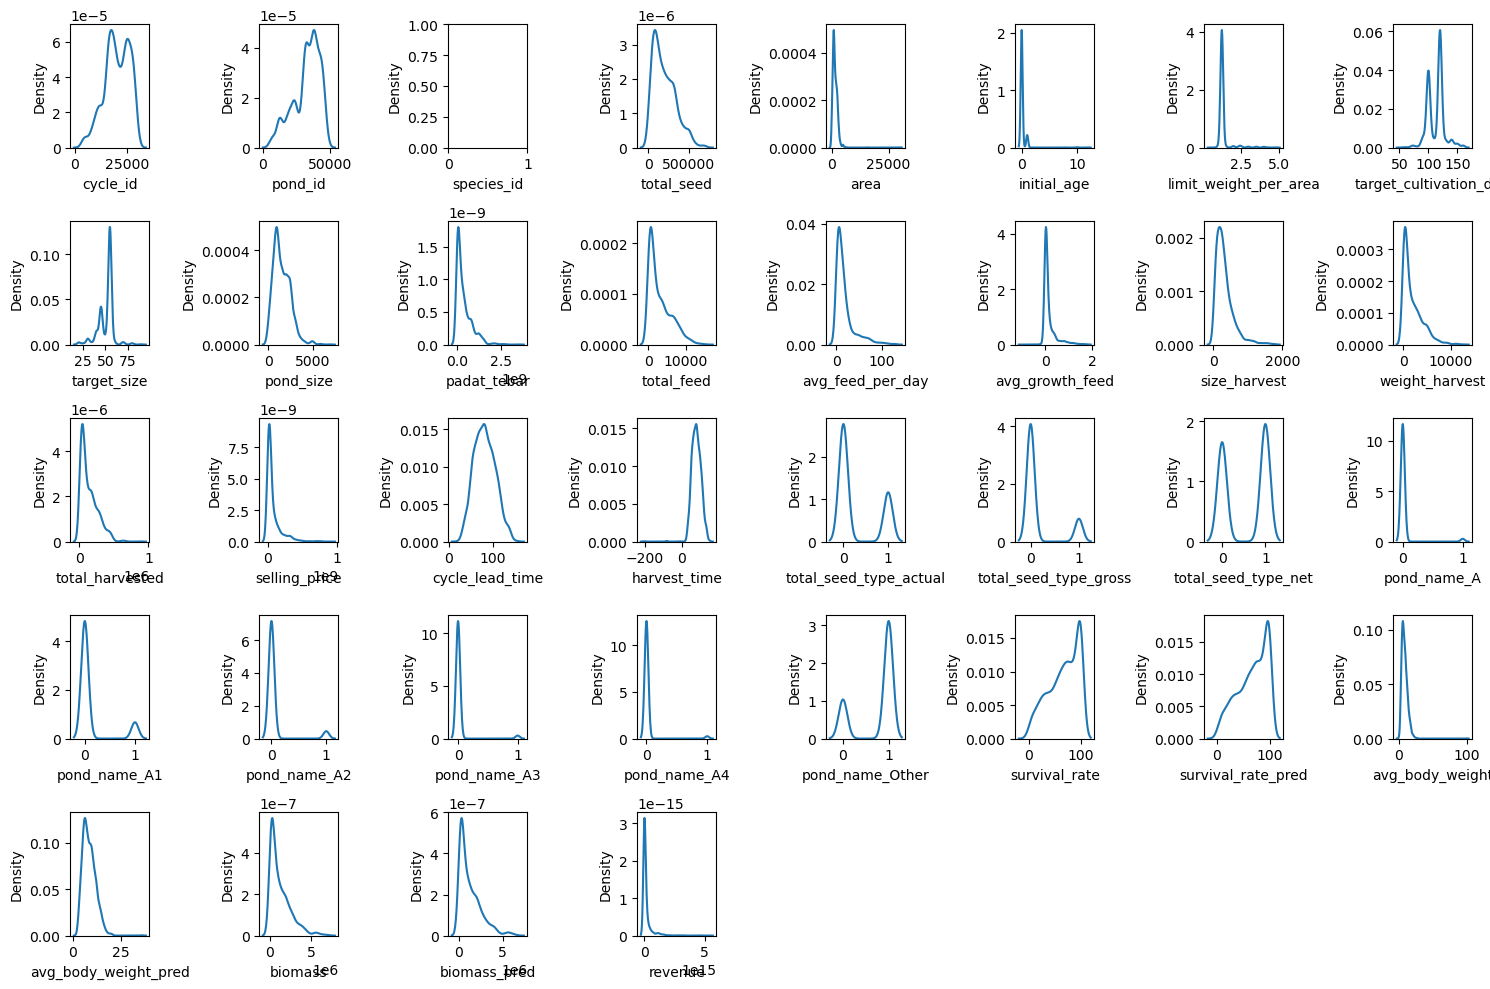

In [10]:
plt.figure(figsize=(15,10))
for i  in range(0, len(nums)):
    plt.subplot(5,8,i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.tight_layout()

**Categorical Columns**

In [11]:
cats = df.select_dtypes(include='object')
cats

""
0
1
2
3
4
...
1850
1851
1852
1853


## Multivariate Analysis ##

<Axes: >

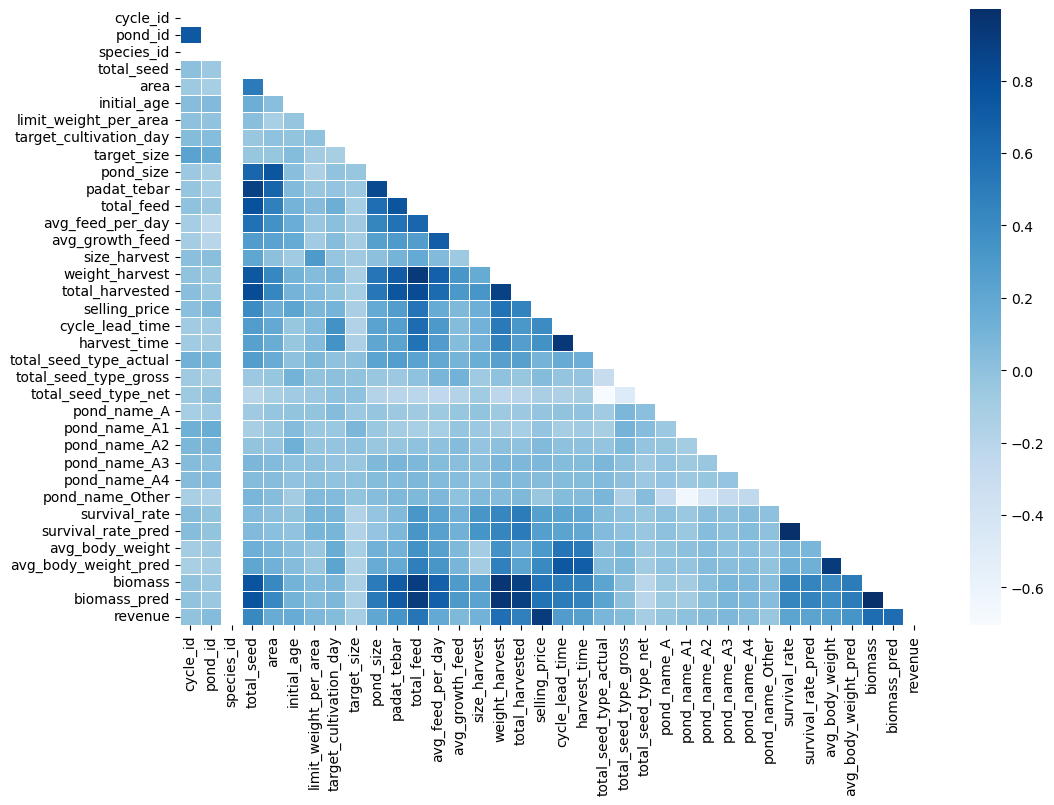

In [12]:
corr = df[nums].corr()
fig, axes = plt.subplots(figsize=(12, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Blues', annot=True, fmt='.2f')
# plt.show()

## Insights ##

pada kolom-kolom numerical hampir semua data terdistribusi dengan baik, tidak ada data yang persebarannya sangat random kecuali pada kolom id (cycle_id, pond_id, species_id)

# Data Preprocessing #

## Data Cleaning ##

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

### 1. Handle Missing Value ###

In [14]:
df.nunique()

cycle_id                  1855
pond_id                   1356
species_id                   1
total_seed                 687
area                       512
initial_age                  9
limit_weight_per_area       19
target_cultivation_day      56
target_size                 17
pond_size                  518
padat_tebar               1204
total_feed                1798
avg_feed_per_day          1423
avg_growth_feed            145
size_harvest              1111
weight_harvest            1587
total_harvested           1766
selling_price             1419
cycle_lead_time            117
harvest_time               119
total_seed_type_actual       2
total_seed_type_gross        2
total_seed_type_net          2
pond_name_A                  2
pond_name_A1                 2
pond_name_A2                 2
pond_name_A3                 2
pond_name_A4                 2
pond_name_Other              2
survival_rate             1343
survival_rate_pred        1564
avg_body_weight            968
avg_body

In [15]:
df.isna().sum()

cycle_id                  0
pond_id                   0
species_id                0
total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_size                 0
padat_tebar               0
total_feed                0
avg_feed_per_day          0
avg_growth_feed           0
size_harvest              0
weight_harvest            0
total_harvested           0
selling_price             0
cycle_lead_time           0
harvest_time              0
total_seed_type_actual    0
total_seed_type_gross     0
total_seed_type_net       0
pond_name_A               0
pond_name_A1              0
pond_name_A2              0
pond_name_A3              0
pond_name_A4              0
pond_name_Other           0
survival_rate             0
survival_rate_pred        0
avg_body_weight           0
avg_body_weight_pred      0
biomass                   0
biomass_pred              0
revenue             

karena dataset merupakan hasil dari modeling sebelumnya, maka tidak ditemukan adanya nilai null pada setiap kolom.

### 2. Handle Duplicated Data ###

In [16]:
df.duplicated(subset=['cycle_id']).sum()

0

tidak ada data duplikat.

### 3. Handle Outliers ###

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1855 non-null   int64  
 1   pond_id                 1855 non-null   int64  
 2   species_id              1855 non-null   int64  
 3   total_seed              1855 non-null   int64  
 4   area                    1855 non-null   float64
 5   initial_age             1855 non-null   int64  
 6   limit_weight_per_area   1855 non-null   float64
 7   target_cultivation_day  1855 non-null   int64  
 8   target_size             1855 non-null   float64
 9   pond_size               1855 non-null   float64
 10  padat_tebar             1855 non-null   float64
 11  total_feed              1855 non-null   float64
 12  avg_feed_per_day        1855 non-null   float64
 13  avg_growth_feed         1855 non-null   float64
 14  size_harvest            1855 non-null   

In [68]:
from scipy import stats
dfz = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dfz)}')

filtered_entries = np.array([True] * len(dfz))

for col in nums:
    zscore = abs(stats.zscore(dfz[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dfz = dfz[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dfz)}')

Jumlah baris sebelum memfilter outlier: 1855
Jumlah baris setelah memfilter outlier: 0


In [69]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                0 non-null      int64  
 1   pond_id                 0 non-null      int64  
 2   species_id              0 non-null      int64  
 3   total_seed              0 non-null      int64  
 4   area                    0 non-null      float64
 5   initial_age             0 non-null      int64  
 6   limit_weight_per_area   0 non-null      float64
 7   target_cultivation_day  0 non-null      int64  
 8   target_size             0 non-null      float64
 9   pond_size               0 non-null      float64
 10  padat_tebar             0 non-null      float64
 11  total_feed              0 non-null      float64
 12  avg_feed_per_day        0 non-null      float64
 13  avg_growth_feed         0 non-null      float64
 14  size_harvest            0 non-null      float64
 15  weight

karena dataset yang digunakan merupakan dataset hasil modeling sebelumnya, maka tidak diperlukan proses membuang outlier.

## Feature Transformation ##

Standardization

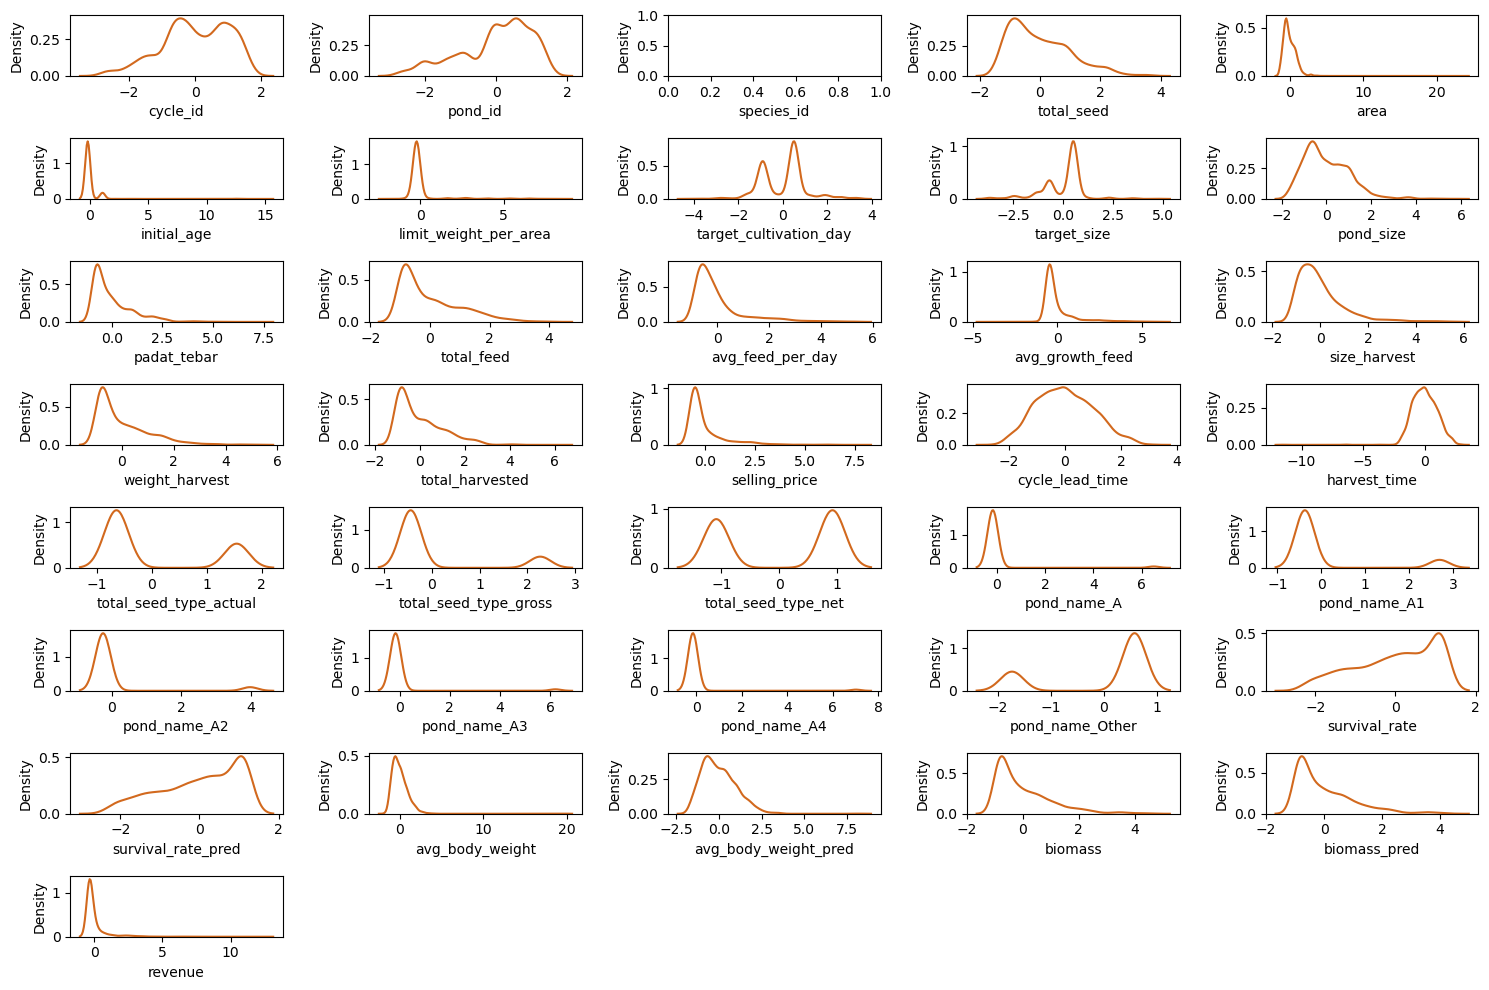

In [19]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

col = df_std.columns
plt.figure(figsize=(15,10))
for i in range(0, len(col)):
    plt.subplot(8, 5, i+1)
    nama = col[i]
    df_std[nama] = StandardScaler().fit_transform(df_std[col[i]].values.reshape(len(df_std),1))
    sns.kdeplot(df_std[nama], color='chocolate')
    plt.tight_layout()

## Feature Selection ##

In [20]:
df_std.head()

,cycle_id,pond_id,species_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_size,...,pond_name_A3,pond_name_A4,pond_name_Other,survival_rate,survival_rate_pred,avg_body_weight,avg_body_weight_pred,biomass,biomass_pred,revenue
0,-2.806681,-1.999594,0.0,2.654958,2.878304,-0.198669,-0.211114,0.495518,-0.692999,3.490474,...,-0.161231,-0.142661,0.576728,0.413068,0.395465,1.103534,1.344936,3.587378,3.688723,0.068617
1,-2.806511,-1.996863,0.0,2.654958,2.878304,-0.198669,-0.211114,0.565663,-0.692999,3.305150,...,-0.161231,-0.142661,0.576728,0.387579,0.391157,1.263101,1.448362,3.700675,3.780488,0.077747
2,-2.706988,-1.860129,0.0,0.124495,-0.209221,-0.198669,-0.211114,0.495518,-0.692999,-0.285254,...,-0.161231,-0.142661,-1.733920,0.706718,0.783205,0.817188,1.138147,0.889750,0.849672,-0.213829
3,-2.706818,-1.860028,0.0,0.208658,-0.159396,-0.198669,-0.211114,0.495518,-0.692999,-0.221860,...,6.202265,-0.142661,-1.733920,0.753855,0.789308,0.723197,1.067671,0.957695,0.977015,-0.201160
4,-2.706648,-1.859926,0.0,-0.127995,-0.383611,-0.198669,-0.211114,0.495518,-0.692999,-0.507699,...,-0.161231,7.009646,-1.733920,0.753157,0.797207,0.782214,1.281495,0.652391,0.570281,-0.241625


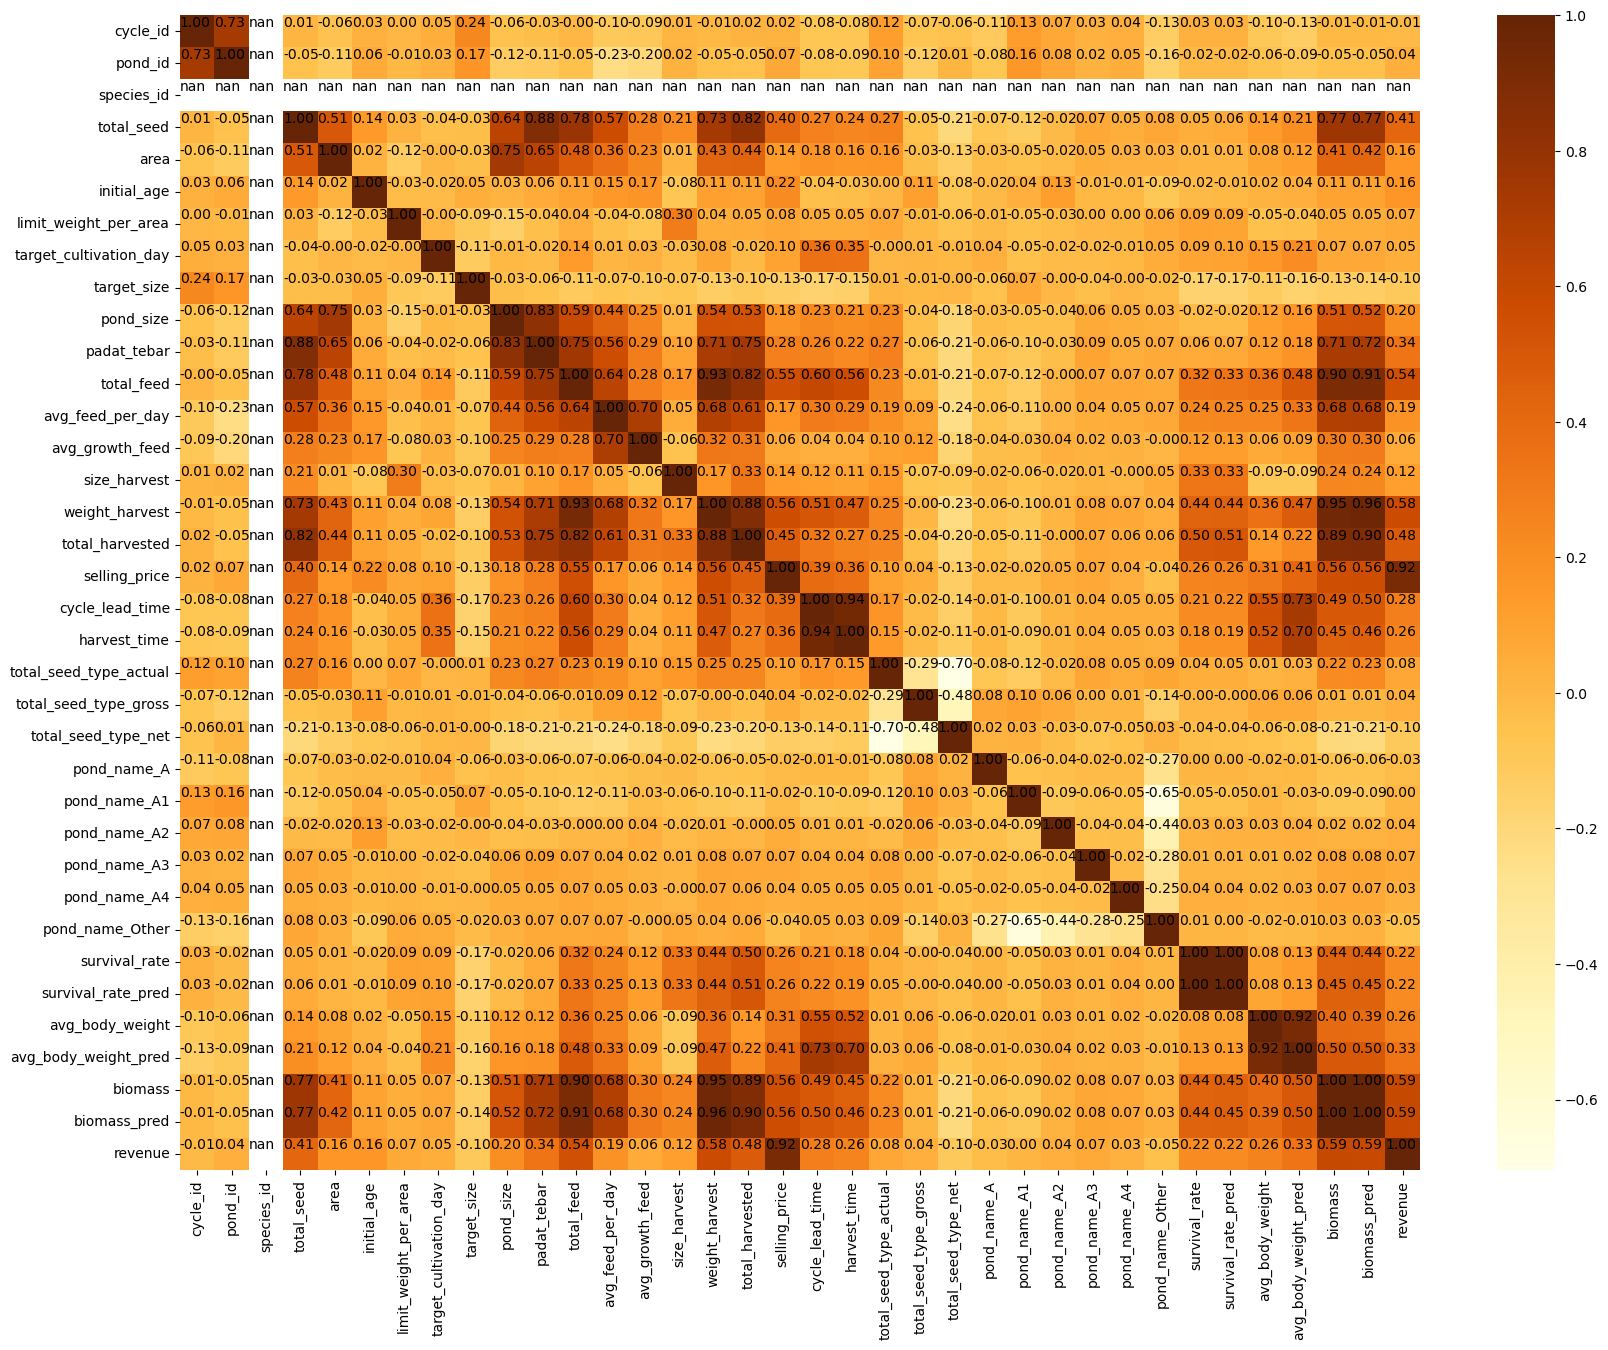

In [21]:
corr = df_std.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='YlOrBr')
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='left', va='top')
# ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

berdasarkan nilai korelasi pada heatmap, kami memutuskan untuk membuang kolom yang memiliki korelasi dibawah 0.1 dan diatas 0.7 dengan kolom target. sehingga terdapat 16 kolom yang akan kami gunakan pada tahap selanjutnya.

In [32]:
df_final = df_std[['cycle_id', 'total_seed', 'area', 'initial_age', 'pond_size', 'padat_tebar',
                   'avg_feed_per_day', 'size_harvest', 'weight_harvest', 'total_harvested', 'cycle_lead_time', 
                   'harvest_time', 'survival_rate_pred', 'avg_body_weight_pred','biomass_pred','revenue']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cycle_id              1855 non-null   float64
 1   total_seed            1855 non-null   float64
 2   area                  1855 non-null   float64
 3   initial_age           1855 non-null   float64
 4   pond_size             1855 non-null   float64
 5   padat_tebar           1855 non-null   float64
 6   avg_feed_per_day      1855 non-null   float64
 7   size_harvest          1855 non-null   float64
 8   weight_harvest        1855 non-null   float64
 9   total_harvested       1855 non-null   float64
 10  cycle_lead_time       1855 non-null   float64
 11  harvest_time          1855 non-null   float64
 12  survival_rate_pred    1855 non-null   float64
 13  avg_body_weight_pred  1855 non-null   float64
 14  biomass_pred          1855 non-null   float64
 15  revenue              

# Data Modeling #

### Split data Train - Test ###

In [33]:
X = df_final.drop('revenue',axis=1)
y = df_final['revenue'].values
print(X.shape)
print(y.shape)

(1855, 15)
(1855,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Basic Modeling ###

In [36]:
lr_sm = LinearRegression()
dt_sm = DecisionTreeRegressor()
rf_sm = RandomForestRegressor()
gb_sm = GradientBoostingRegressor()

In [37]:
from sklearn.model_selection import cross_validate

def eval_classification(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    mae = mean_absolute_error(y_test, y_pred)
    mae1 = mean_absolute_error(y_train, y_pred_train)
    mse = mean_squared_error(y_test, y_pred)
    mse1 = mean_squared_error(y_train, y_pred_train)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse1 = mean_squared_error(y_train, y_pred_train, squared=False)
    r2 = r2_score(y_test, y_pred)
    r21 = r2_score(y_train, y_pred_train)
    
    results = {'MAE (Test Set)': mae,
               'MAE (Train Set)': mae1,
               'MSE (Test Set)': mse,
               'MSE (Train Set)': mse1,
               'RMSE (Test Set)': rmse,
               'RMSE (Train Set)': rmse1,
               'R2-Score (Test Set)': r2,
               'R2-Score (Train Set)': r21
               }
    return results

In [38]:
model_list = [lr_sm, dt_sm, rf_sm, gb_sm]
results_list = []
for model in model_list:
    results = eval_classification(model)
    results_list.append(results)

In [39]:
df_results = pd.DataFrame(results_list, index=['Linear Regression',
                                               'Decision Tree',
                                               'Random Forest',
                                               'Gradient Boosting'])

df_results

,MAE (Test Set),MAE (Train Set),MSE (Test Set),MSE (Train Set),RMSE (Test Set),RMSE (Train Set),R2-Score (Test Set),R2-Score (Train Set)
Linear Regression,0.374522,3.468813e-01,0.630794,4.628506e-01,0.794226,6.803313e-01,0.464839,0.515458
Decision Tree,0.173198,4.733230e-11,0.253927,5.068316e-19,0.503912,7.119211e-10,0.784570,1.000000
Random Forest,0.163528,5.681249e-02,0.306121,3.093529e-02,0.553282,1.758843e-01,0.740290,0.967615
Gradient Boosting,0.177401,9.706005e-02,0.250848,3.139742e-02,0.500847,1.771932e-01,0.787183,0.967131


dari hasil modeling diatas, algoritma **Random Forest** menunjukkan nilai/scoring yang bagus pada masing-masing metrics, sehingga algoritma tersebut yang akan digunakan untuk melanjutkan proses forecasting.

### Hyperparameter Tuning ###

In [41]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf_sm, param_distributions=params, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")

best_rf_sm = random_search.best_estimator_
y_pred_best_rf = best_rf_sm.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Mean Squared Error (Best): {mse_best_rf}")
print(f"Mean Absolute Error (Best): {mae_best_rf}")
print(f"R-squared (Best): {r2_best_rf}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Mean Squared Error (Best): 0.29971798332773786
Mean Absolute Error (Best): 0.16482332005170372
R-squared (Best): 0.7457216601662384


### Feature Importance ###

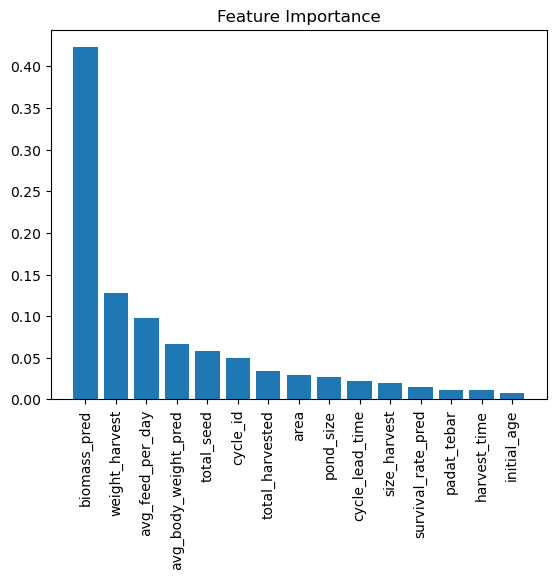

In [42]:
importances = best_rf_sm.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Deployment #

In [43]:
import joblib

joblib.dump(best_rf_sm, 'best_rf_model_4.pkl')

['best_rf_model_4.pkl']

In [44]:
loaded_model = joblib.load('best_rf_model_4.pkl')
y_pred_loaded = loaded_model.predict(X_test)

In [45]:
df_new = df.copy()
X_new = df_new.drop('revenue',axis=1)
y_new = df_new['revenue'].values

In [46]:
loaded_model.fit(X_new, y_new)
y_pred = loaded_model.predict(X_new)

In [47]:
df_neww = X_new
df_neww['revenue'] = df_new['revenue']
df_neww['revenue_pred'] = y_pred

In [52]:
df_output = df_neww[['cycle_id', 'survival_rate_pred', 'avg_body_weight_pred', 'biomass_pred', 'revenue_pred']]
df_output['biomass_pred'] = round(df_output['biomass_pred'],2)
df_output['revenue_pred'] = round(df_output['revenue_pred'],2)
df_output.sample(10)

,cycle_id,survival_rate_pred,avg_body_weight_pred,biomass_pred,revenue_pred
1245,23842,74.50,5.527850,300783.97,7.013002e+12
535,16488,73.59,8.798641,1508179.88,5.118511e+13
1854,29874,36.60,8.385641,396420.74,1.585236e+13
14,4442,82.25,12.125678,967014.42,3.329306e+13
715,18108,4.46,4.987103,34714.98,1.686787e+12
27,5223,71.54,14.540080,4310098.74,2.069223e+15
1523,26110,47.08,6.310675,439137.72,9.623800e+12
296,14346,68.61,3.696399,29676.90,7.291077e+10
543,16503,33.04,8.185192,769801.39,2.648682e+13
16,4491,59.24,3.421759,161032.04,5.473074e+12


In [53]:
df_output.to_csv('output.csv', index=False)